In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# load datase
df = pd.read_csv('iris.csv')
X = df.drop('species', axis=1)
y = df.species

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.svm import SVC

In [7]:
scaler = StandardScaler()

In [8]:
svm = SVC()

In [26]:
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('svm',svm)]

In [11]:
pipe = Pipeline(operations)

In [12]:
from sklearn.model_selection import GridSearchCV

chosen_string_name + two underscores + parameter key name model_name + + parameter name knn_model + + n_neighbors knn_model__n_neighbors

In [27]:
param_grid = {'svm__C':[0.01,0.1,1],'svm__kernel':['linear','rbf']}

In [28]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')

In [29]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 1],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [30]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('svm', SVC(C=1, kernel='linear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svm': SVC(C=1, kernel='linear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svm__C': 1,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'linear',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [31]:
y_pred = full_cv_classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



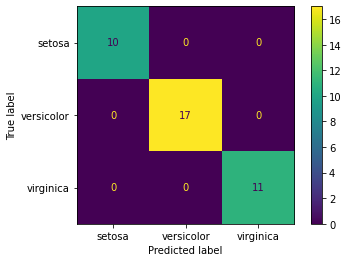

In [35]:
plot_confusion_matrix(full_cv_classifier, X_test, y_test)